In [69]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from ast import literal_eval
from itertools import chain
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv("10kmovies.csv")

In [47]:
df.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


In [48]:
df.shape

(10000, 14)

In [49]:
df.isnull().sum() #tagline,overview and release date have null values. Not interested in this so will drop them.

id                         0
title                      0
release_date              21
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  77
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2759
dtype: int64

In [50]:
df.drop(columns = ['release_date','overview','tagline'], inplace = True) # Dropping the columns will null values.

In [51]:
df.isnull().sum()

id                      0
title                   0
genres                  0
original_language       0
vote_average            0
vote_count              0
popularity              0
budget                  0
production_companies    0
revenue                 0
runtime                 0
dtype: int64

In [52]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [53]:
df.shape

(10000, 11)

In [54]:
df.genres.unique()

array(["['Horror', 'Mystery', 'Thriller']",
       "['Action', 'Adventure', 'Science Fiction']",
       "['Animation', 'Adventure', 'Family', 'Fantasy', 'Comedy']", ...,
       "['Thriller', 'Drama', 'Music']",
       "['Fantasy', 'Animation', 'Action', 'Adventure', 'Science Fiction', 'Drama', 'Romance']",
       "['TV Movie', 'Fantasy', 'Animation', 'Action', 'Thriller', 'Science Fiction', 'Horror']"],
      dtype=object)

In [55]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [56]:
df.corr()

C:\Users\Richard\AppData\Local\Temp\ipykernel_6704\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,vote_average,vote_count,popularity,budget,revenue,runtime
id,1.000000,-0.241569,-0.259859,0.102688,-0.243411,-0.207591,-0.256838
vote_average,-0.241569,1.000000,0.253543,0.040162,0.074849,0.149643,0.388440
vote_count,-0.259859,0.253543,1.000000,0.069693,0.600121,0.753206,0.288462
popularity,0.102688,0.040162,0.069693,1.000000,0.143257,0.148195,0.038973
budget,-0.243411,0.074849,0.600121,0.143257,1.000000,0.735239,0.282498
revenue,-0.207591,0.149643,0.753206,0.148195,0.735239,1.000000,0.253162
runtime,-0.256838,0.388440,0.288462,0.038973,0.282498,0.253162,1.000000


In [57]:
df.dtypes

id                        int64
title                    object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
dtype: object

In [58]:
data = df.copy()

In [59]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [60]:
action_movies = df[df['genres'].str.contains('Action')] # will output rows with action genre in them

In [61]:
action_movies = df[df['genres'] == 'Action']# will output rows with ONLY action genre in them. - there are none.

In [62]:
action_movies

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime


In [65]:
# Convert string representations to actual lists
df['genres'] = df['genres'].apply(literal_eval)

print(df)

          id                              title  \
0     758323                The Pope's Exorcist   
1     640146  Ant-Man and the Wasp: Quantumania   
2     502356        The Super Mario Bros. Movie   
3     868759                            Ghosted   
4     594767           Shazam! Fury of the Gods   
...      ...                                ...   
9995  374473                    I, Daniel Blake   
9996   16774  Hellboy Animated: Sword of Storms   
9997   13564    Return to House on Haunted Hill   
9998  482204             My Sister-in-law's Job   
9999  444539                       The Bookshop   

                                                 genres original_language  \
0                           [Horror, Mystery, Thriller]           English   
1                  [Action, Adventure, Science Fiction]           English   
2       [Animation, Adventure, Family, Fantasy, Comedy]           English   
3                             [Action, Comedy, Romance]           English   
4 

In [66]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"[Horror, Mystery, Thriller]",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"[Action, Adventure, Science Fiction]",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"[Animation, Adventure, Family, Fantasy, Comedy]",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"[Action, Comedy, Romance]",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"[Action, Comedy, Fantasy, Adventure]",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [67]:
# Flatten the lists and convert to Series
flattened_series = pd.Series(chain.from_iterable(df['genres']))

# Get unique genres
unique_genres = flattened_series.unique()

print(unique_genres)

['Horror' 'Mystery' 'Thriller' 'Action' 'Adventure' 'Science Fiction'
 'Animation' 'Family' 'Fantasy' 'Comedy' 'Romance' 'Drama' 'History' 'War'
 'Crime' 'Music' 'Western' 'TV Movie' 'Documentary']


In [71]:
len(unique_genres)

19

C:\Users\Richard\Anaconda june 2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          id                              title  \
0     758323                The Pope's Exorcist   
1     640146  Ant-Man and the Wasp: Quantumania   
2     502356        The Super Mario Bros. Movie   
3     868759                            Ghosted   
4     594767           Shazam! Fury of the Gods   
...      ...                                ...   
9995  374473                    I, Daniel Blake   
9996   16774  Hellboy Animated: Sword of Storms   
9997   13564    Return to House on Haunted Hill   
9998  482204             My Sister-in-law's Job   
9999  444539                       The Bookshop   

                                                 genres original_language  \
0                           [Horror, Mystery, Thriller]           English   
1                  [Action, Adventure, Science Fiction]           English   
2       [Animation, Adventure, Family, Fantasy, Comedy]           English   
3                             [Action, Comedy, Romance]           English   
4 

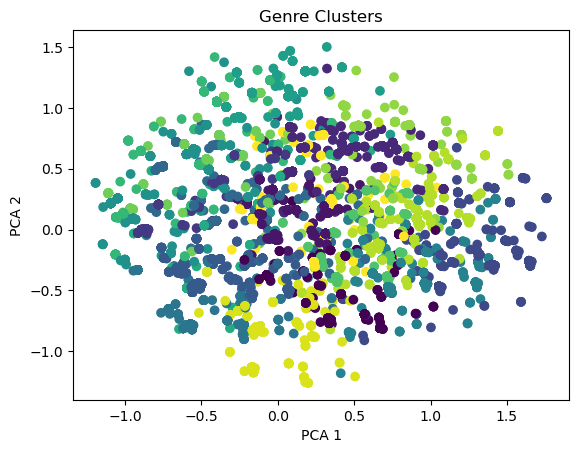

In [72]:
# Convert genres to binary encoding
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df['genres'])

# Choose the number of clusters
num_clusters = 19

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
df['cluster'] = kmeans.fit_predict(genre_matrix)

# Print the results
print(df)

# Visualize clusters (2D PCA for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(genre_matrix)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

plt.scatter(df['pca_1'], df['pca_2'], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Genre Clusters')
plt.show()